<a href="https://colab.research.google.com/github/Hanifanta/Coffee-Recommendation-System/blob/main/Coffee_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from nltk import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('white')
sns.set_palette('Set3')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [ ]:
df = pd.read_csv('/content/coffee_df_with_type_and_region.csv')
df['slug'] = df['slug'].map(lambda x: x[8:])
df.set_index('slug', inplace=True)
df = df.drop_duplicates('desc_1')
df.head()

,all_text,rating,roaster,name,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,...,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
slug,,,,,,,,,,,,,,,,,,,,,
www.coffeereview.com/review/wilton-benitez-geisha/,\n\n\n95\n\n\nJBC Coffee Roasters\nWilton Ben...,95,JBC Coffee Roasters,Wilton Benitez Geisha,0,0,0,0,0,1,...,59/81,9.0,9.0,9.0,9.0,9.0,NaN,"Richly floral-toned, exceptionally sweet. Dist...",Produced by Wilton Benitez of Macarena Farm en...,"A nuanced, complex experimentally processed Co..."
www.coffeereview.com/review/colombia-cerro-azul-geisha-2/,\n\n\n95\n\n\nBird Rock Coffee Roasters\nColo...,95,Bird Rock Coffee Roasters,Colombia Cerro Azul Geisha,0,0,0,0,0,1,...,62/80,9.0,9.0,9.0,9.0,9.0,NaN,"Richly aromatic, chocolaty, fruit-toned. Dark ...",Produced by Rigoberto Herrera of Granja La Esp...,"A trifecta of fruit, chocolate and flowers, bo..."
www.coffeereview.com/review/yirgacheffe-mengesha-natural/,\n\n\n94\n\n\nRegent Coffee\nYirgacheffe Meng...,94,Regent Coffee,Yirgacheffe Mengesha Natural,1,0,0,0,0,0,...,60/77,9.0,9.0,9.0,9.0,8.0,NaN,"High-toned, fruit-driven. Boysenberry, pear, c...",Produced at Mengesha Farm from selections of i...,A fruit medley in a cup — think boysenberry an...
www.coffeereview.com/review/colombia-tolima-finca-el-mirador-washed-anaerobic/,\n\n\n93\n\n\nRegent Coffee\nColombia Tolima ...,93,Regent Coffee,Colombia Tolima Finca El Mirador Washed Anaerobic,0,0,0,0,0,1,...,59/79,9.0,9.0,8.0,9.0,8.0,NaN,"Delicately fruit-toned. Guava, ginger blossom,...",Produced by Victor Gutiérrez of Finca Mirador ...,"An appealing washed anaerobic cup: deep-toned,..."
www.coffeereview.com/review/panama-geisha-finca-debra-symbiosis/,\n\n\n94\n\n\nTheory Coffee Roasters\nPanama ...,94,Theory Coffee Roasters,Panama Geisha Finca Debra Symbiosis,0,0,1,0,0,0,...,62/80,9.0,9.0,9.0,9.0,8.0,NaN,"Richly fruit-forward, floral-toned. Lychee, te...",Produced by Jamison Savage of Finca Debra enti...,A floral- and fruit-driven anaerobic natural P...


In [ ]:
df.shape[0]

2280

In [ ]:
df['text'] = df['desc_1']+df['desc_3'].fillna('')

In [ ]:
tokenizer = RegexpTokenizer('\w+')
p_stemmer = PorterStemmer()

stops = set(stopwords.words('english'))

more_stops = ['cup', 'cupper', 'cupping','reviewer','one','two','three','four',
              'co','taster','review', 'panel','panelist','rating', 'others', 'found',
              'nominating','reader','writes', 'ken', 'kenneth', 'davids', 'ron','walters',
              'kim','westerman', 'jason','sarley','jen', 'apodaca', 'ted','lingle', 
              'teri','bolla', 'willem','boot','ethan','hill','peggy','sue', 'martin', 'freeman', 
              'andrey', 'akselrod', 'heather', 'perry', 'byron', 'holcomb','andy', 'newbom', 
              'sean', 'kohmescher', 'john','diruocco', 'carolina', 'facciani', 'schulz', 
              'john', 'outler', 'monique', 'tam', 'woodard', 'springstube', 'dowling',
              'des', 'cabigan', 'christopher', 'losa', 'robert', 'bobbs', 'al', 'welker',
              'jennifer','stone']
for w in more_stops:
    stops.add(w)

def to_words(raw_text):
    raw_text = re.sub('\d+', '', raw_text)
    words = tokenizer.tokenize(raw_text.lower())
    meaningful_words = [p_stemmer.stem(w) for w in words if not w in stops]

    return (" ".join(meaningful_words))

clean_text = []

for t in df['text']:
    clean_text.append(to_words(t))

df['clean_text'] = clean_text

In [ ]:
cv = CountVectorizer(min_df=2, ngram_range=(2,2))
text_cv = cv.fit_transform(clean_text)
df_cv = pd.DataFrame(text_cv.toarray(), columns = cv.get_feature_names())

In [ ]:
lda = LatentDirichletAllocation(5, random_state=42)
lda.fit(df_cv);

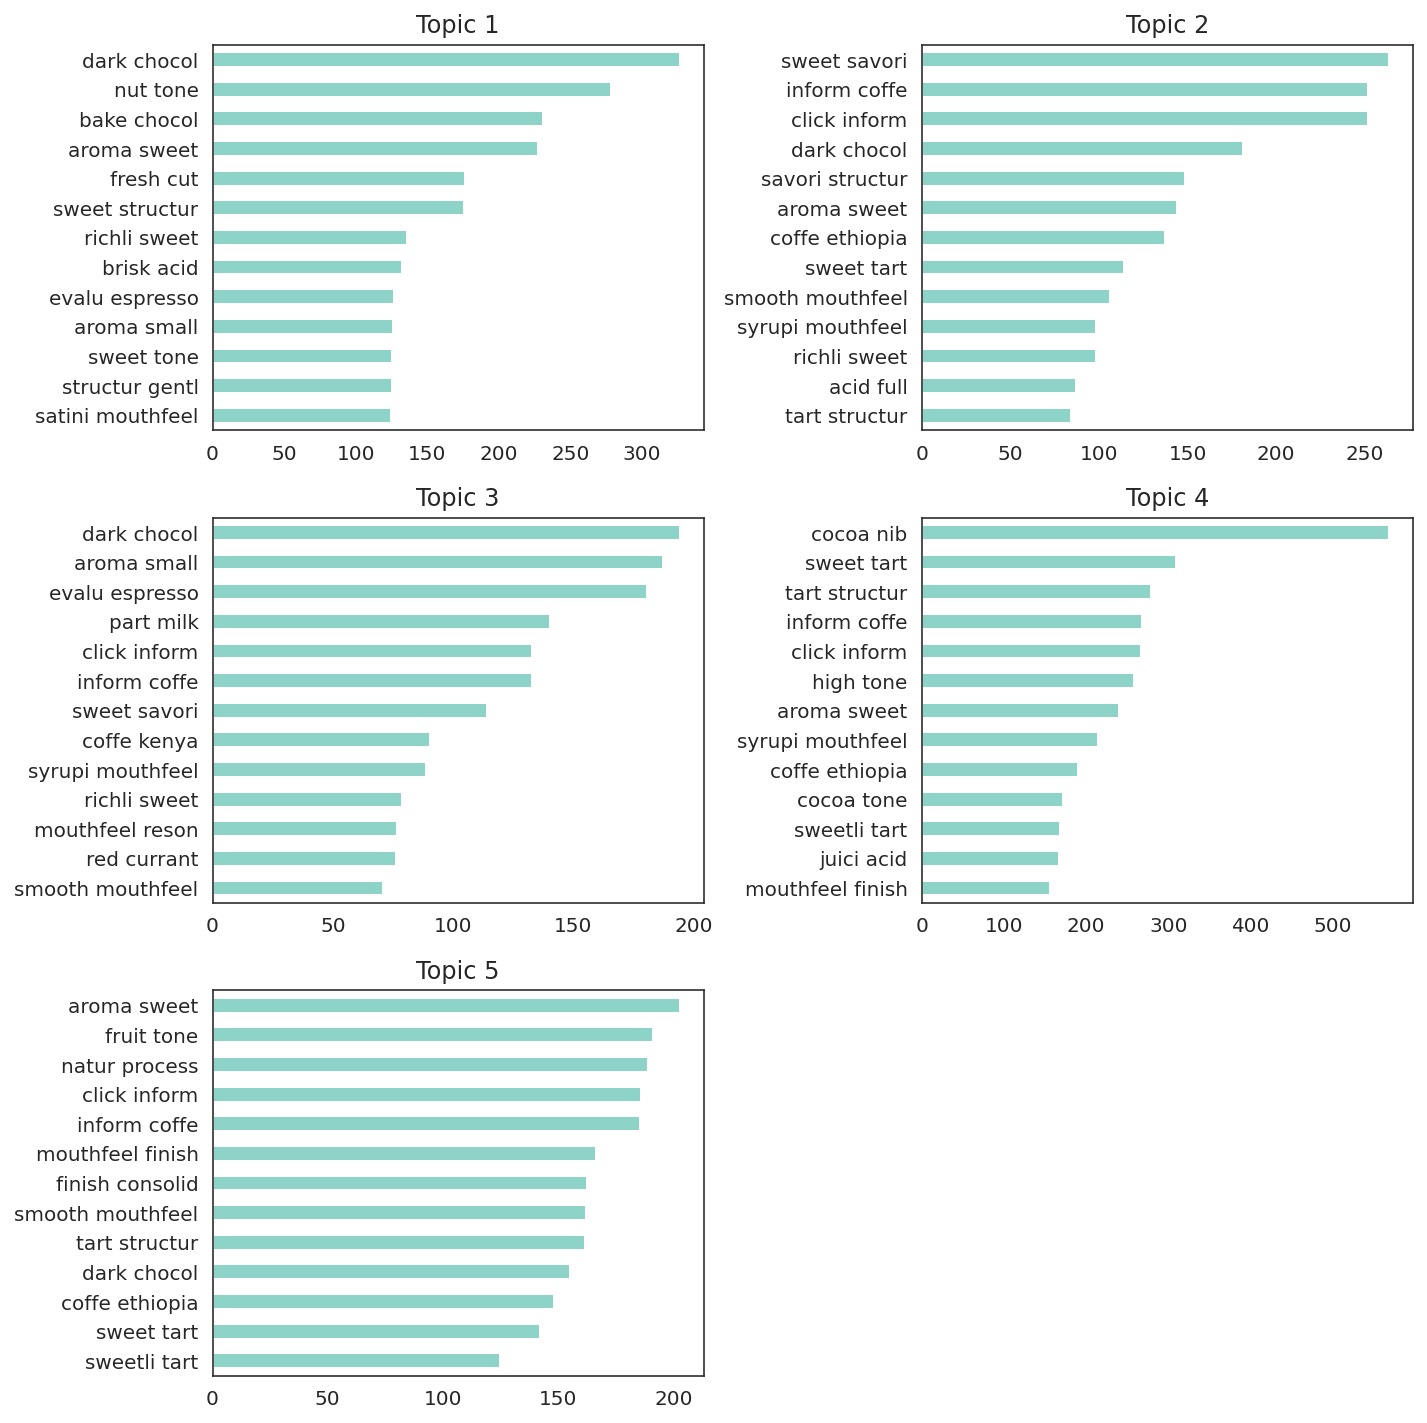

In [ ]:
def display_topics(model, feature_names, no_words = 10):
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):
        topic = zip(feature_names, topic)
        topic = sorted(topic, key = lambda pair: pair[1])
        topic_words = [(token, counts) for token, counts in topic[:-no_words - 1:-1]]
        topics_tokens.append(topic_words)
    
    fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=2)
    topics = [{key: value for key, value in topic} 
            for topic in topics_tokens]

    row = 0
    for topic_id, topic in enumerate(topics):
        column = (0 if topic_id % 2 == 0 else 1)
        chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
        chart.plot(kind="barh", title= f"Topic {topic_id +1}", ax=ax[row, column])
        row += 1 if column == 1 else 0
    

display_topics(lda, cv.get_feature_names(), no_words=13)

ax = plt.subplot(3,2,6)
ax.axis('off')
plt.tight_layout()

In [ ]:
df.isnull().sum()

all_text                     0
rating                       0
roaster                      0
name                         0
region_africa_arabia         0
region_caribbean             0
region_central_america       0
region_hawaii                0
region_asia_pacific          0
region_south_america         0
type_espresso                0
type_organic                 0
type_fair_trade              0
type_decaffeinated           0
type_best_value              0
type_pod_capsule             0
type_blend                   0
type_estate                  0
type_peaberry                0
type_barrel_aged             0
type_aged                    0
location                     0
origin                       0
roast                       53
est_price                    5
review_date                  0
agtron                       0
aroma                       26
acid                       327
body                         2
flavor                       2
aftertaste                   2
with_mil

In [ ]:
df.dropna(subset=['aroma','body','flavor'], axis = 0, inplace= True)
df.shape[0]

2254

In [ ]:
df[df.acid.isnull() ^ df.with_milk.isnull()].shape[0]

2252

In [ ]:
df[~df.acid.isnull() & ~df.with_milk.isnull()][['acid','with_milk']]

,acid,with_milk
slug,,
www.coffeereview.com/review/ethiopia-guji-natural-euphora-special-lot/,9.0,5.0


In [ ]:
df['acid_or_milk'] = df['acid'].fillna(df.with_milk)
df['type_with_milk'] = df['with_milk'].fillna(0).map(lambda x: 1 if x > 0 else 0)

In [ ]:
df.acid_or_milk.isnull().sum()

1

In [ ]:
df = df.dropna(subset=['acid_or_milk'],axis=0)

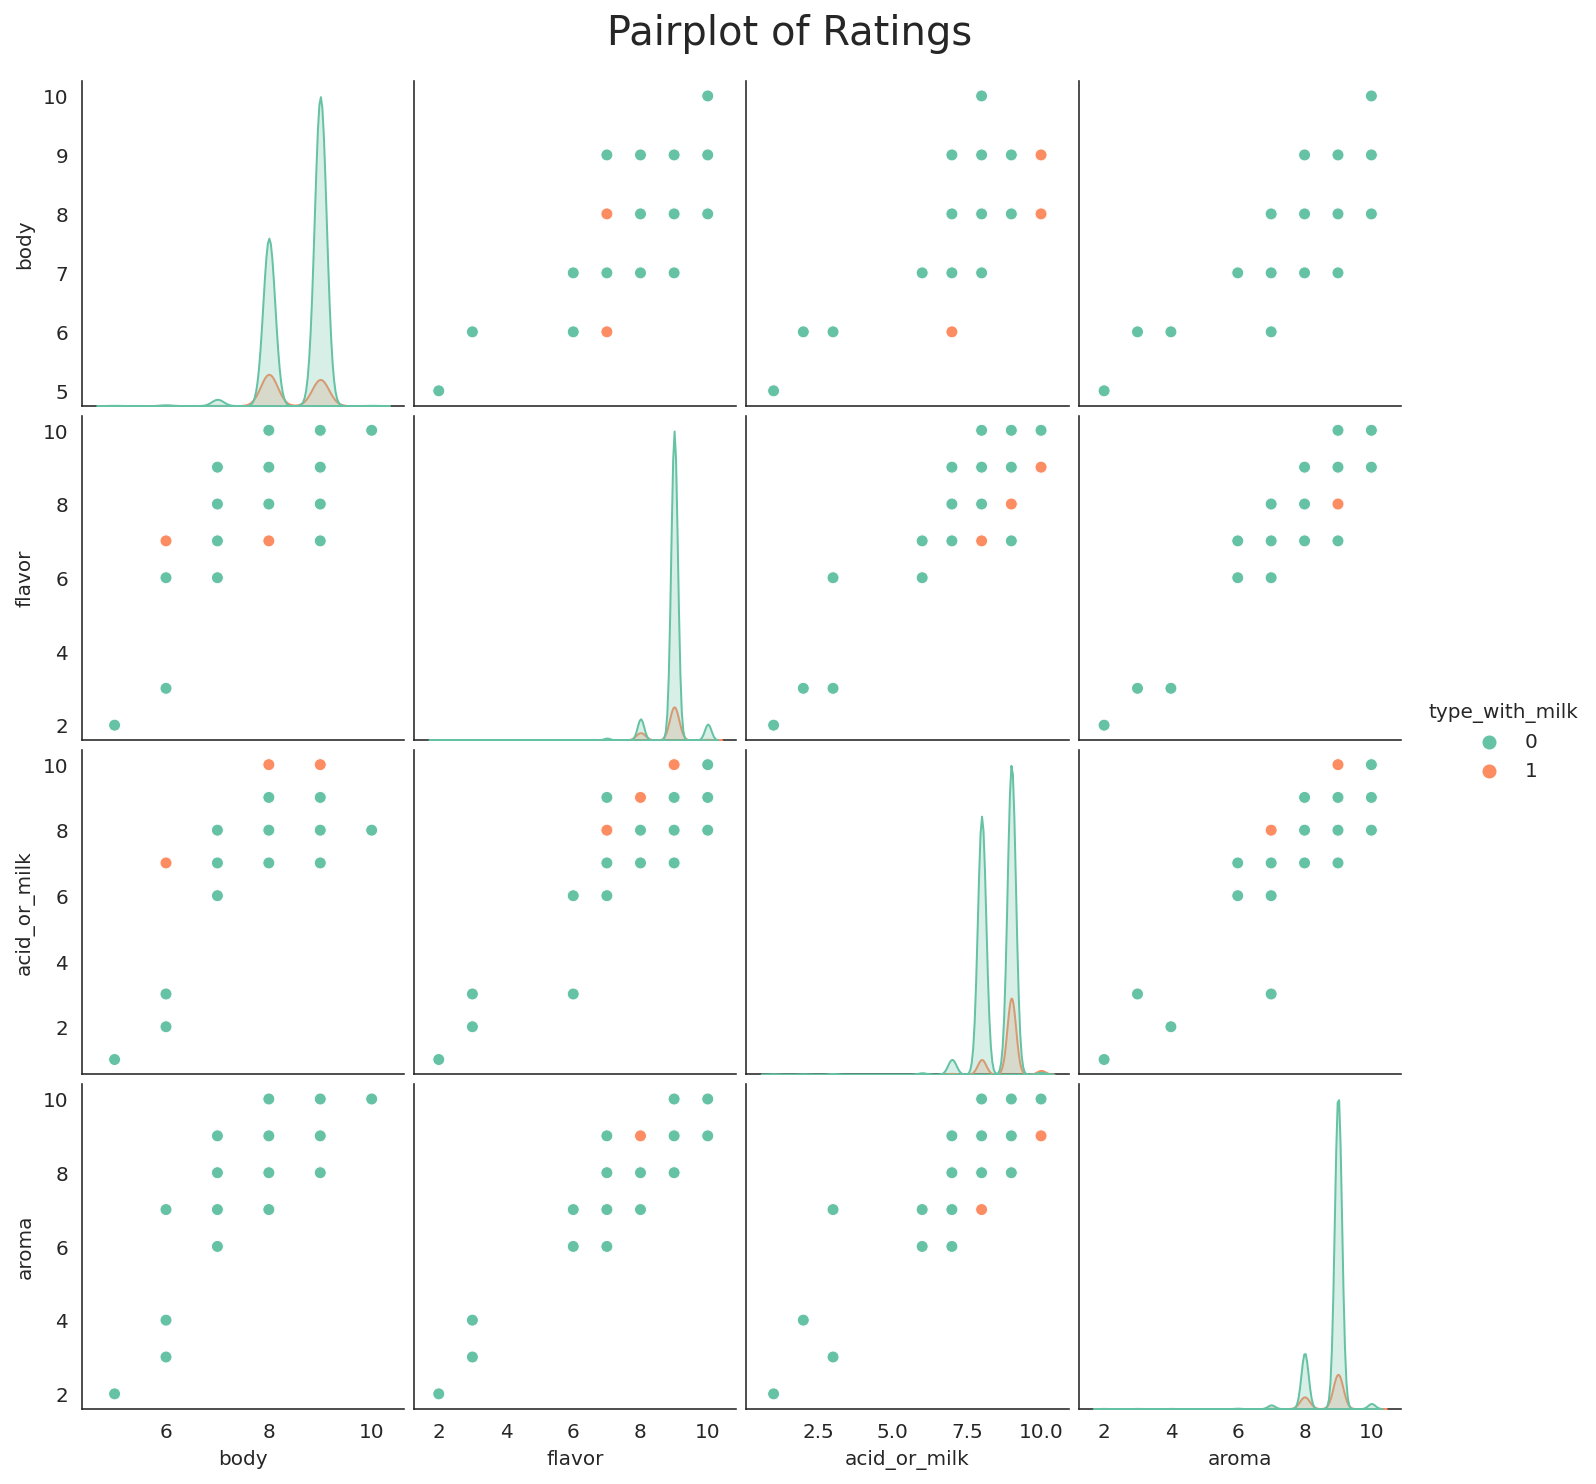

In [ ]:
sns.pairplot(df[['body','flavor','acid_or_milk','aroma','type_with_milk']], 
             vars = ['body','flavor','acid_or_milk','aroma'], hue= 'type_with_milk',
             palette='Set2')
plt.suptitle("Pairplot of Ratings", fontsize = 20, y=1.03);

In [ ]:
regions = ['region_africa_arabia', 'region_caribbean', 'region_central_america', 
           'region_hawaii', 'region_asia_pacific', 'region_south_america']
types = ['type_espresso', 'type_organic', 'type_fair_trade', 
         'type_decaffeinated','type_best_value', 'type_pod_capsule', 
         'type_blend', 'type_estate', 'type_peaberry', 
         'type_barrel_aged', 'type_aged', 'type_with_milk']

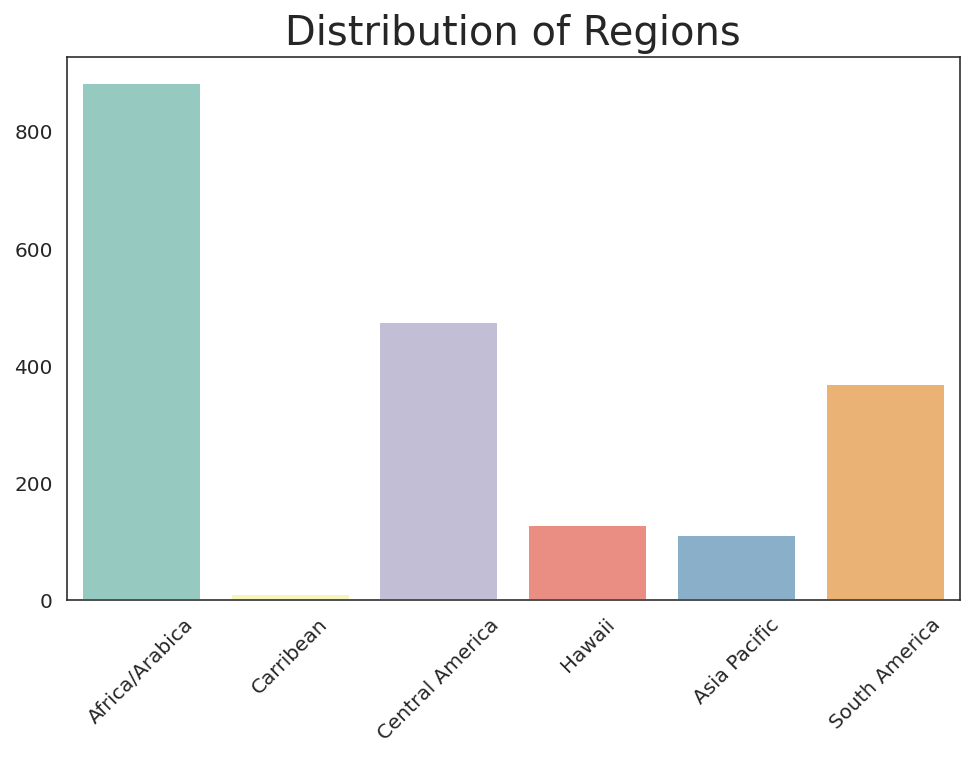

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(regions, df[regions].sum(),
        palette='Set3')
plt.xticks(rotation = 45)
plt.xticks(np.arange(6), ('Africa/Arabica', 'Carribean','Central America',
                          'Hawaii','Asia Pacific','South America'),rotation='45');
plt.title("Distribution of Regions", fontsize = 20);

In [ ]:
df['region_sum'] = df[regions].sum(axis=1)
df['region_sum'].value_counts(normalize = True).sort_index()

0    0.137594
1    0.847315
2    0.015091
Name: region_sum, dtype: float64

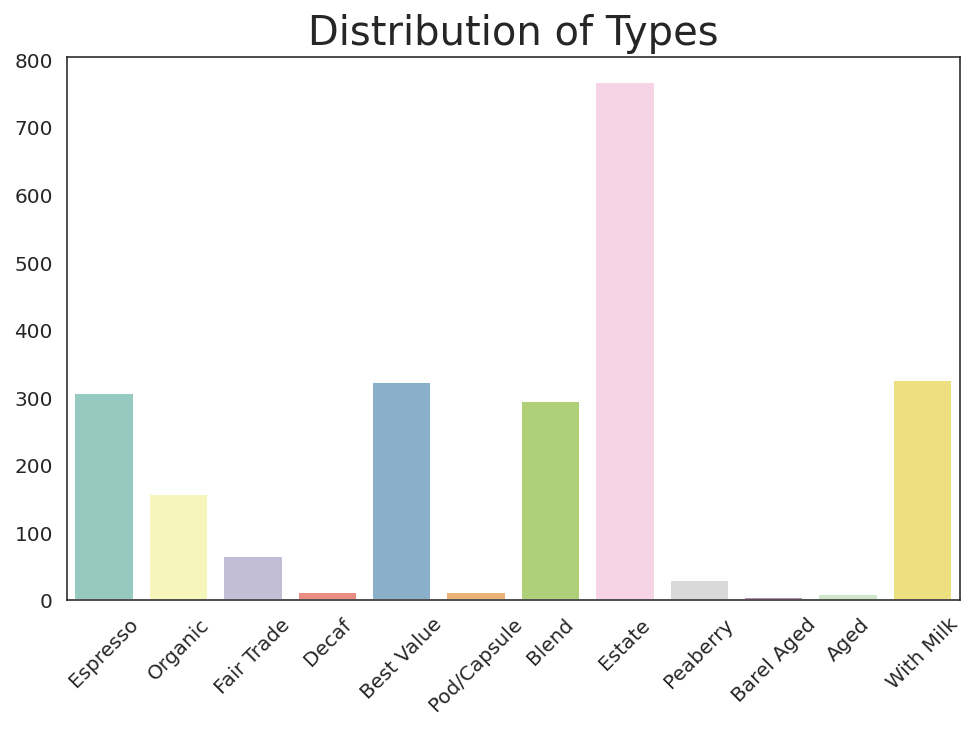

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(types, df[types].sum(),
        palette='Set3')
plt.xticks(rotation = 45)
plt.xticks(np.arange(12), ('Espresso', 'Organic','Fair Trade',
                          'Decaf','Best Value', 'Pod/Capsule',
                           'Blend','Estate','Peaberry', 
                           'Barel Aged', 'Aged', 'With Milk'), rotation='45')
plt.title("Distribution of Types", fontsize = 20);

In [ ]:
df[types].sum(axis=1).value_counts()

1    878
0    825
2    283
3    215
4     46
5      5
6      1
dtype: int64

In [ ]:
roasts_df = pd.get_dummies(df.roast,dummy_na=True,prefix='roast')
roast_names = roasts_df.columns
roasts_df.columns = [re.sub('[ -]','_', name.lower()) for name in roast_names]
roasts_df.head()

,roast_dark,roast_light,roast_medium,roast_medium_dark,roast_medium_light,roast_nan
slug,,,,,,
www.coffeereview.com/review/wilton-benitez-geisha/,0,0,0,0,1,0
www.coffeereview.com/review/colombia-cerro-azul-geisha-2/,0,1,0,0,0,0
www.coffeereview.com/review/yirgacheffe-mengesha-natural/,0,0,0,0,1,0
www.coffeereview.com/review/colombia-tolima-finca-el-mirador-washed-anaerobic/,0,0,0,0,1,0
www.coffeereview.com/review/panama-geisha-finca-debra-symbiosis/,0,1,0,0,0,0


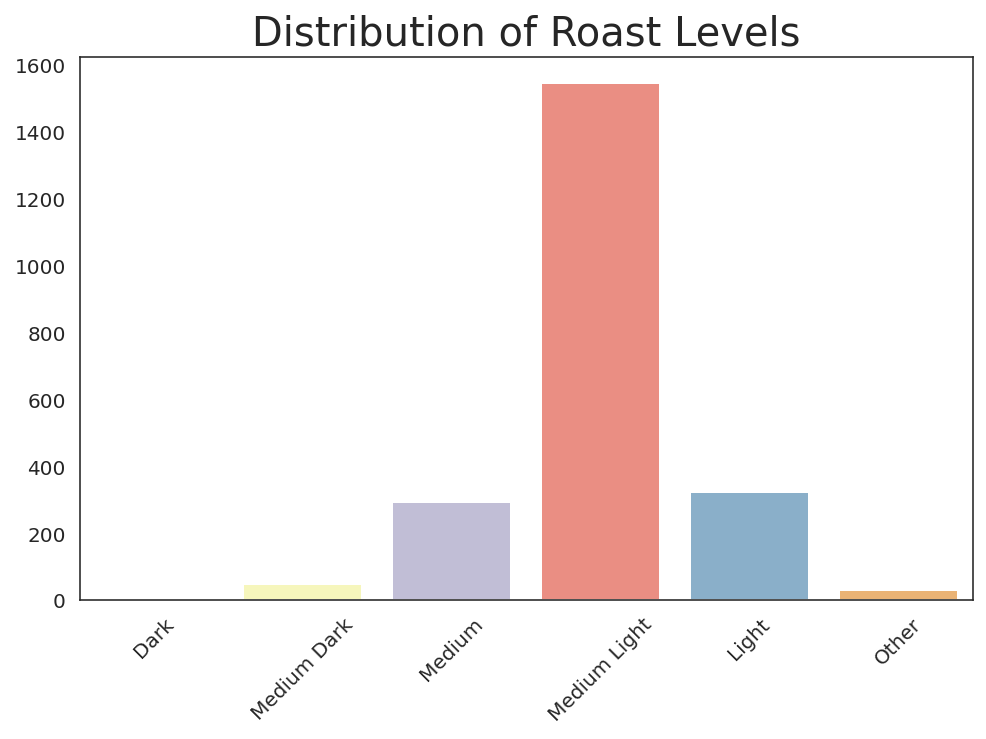

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(['roast_dark', 'roast_medium_dark', 
         'roast_medium', 'roast_medium_light', 'roast_light', 'roast_nan'],
        roasts_df[['roast_dark', 'roast_medium_dark', 
         'roast_medium', 'roast_medium_light', 'roast_light', 'roast_nan']].sum(),
           palette='Set3')
plt.xticks(np.arange(6), ('Dark', 'Medium Dark', 
                          'Medium', 'Medium Light', 'Light', 'Other'),rotation='45');
plt.title("Distribution of Roast Levels", size =20);

([<matplotlib.patches.Wedge at 0x7f525c207550>,
 [Text(-0.6372176598789127, 0.8966346267786242, ''),
  Text(0.13650843411201696, -1.091496883832604, ''),
  Text(0.9253787924701616, -0.5947050449142547, ''),
  Text(1.0960443506810467, -0.09320290414017691, ''),
  Text(1.0999725128791056, -0.0077763044195845, '')])

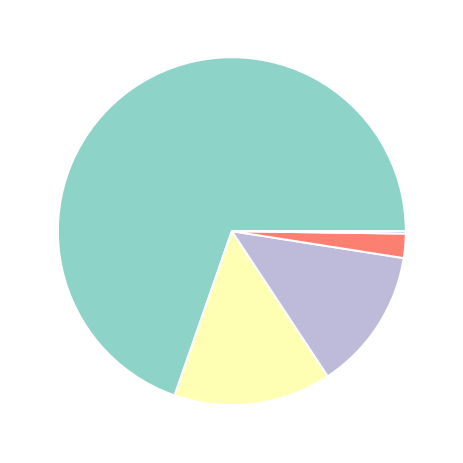

In [ ]:
plt.pie(df['roast'].value_counts())

In [ ]:
roasts_df.columns

Index(['roast_dark', 'roast_light', 'roast_medium', 'roast_medium_dark',
       'roast_medium_light', 'roast_nan'],
      dtype='object')

In [ ]:
df = pd.concat([df, roasts_df], axis = 1)

In [ ]:
id_columns = ['name', 'roaster', 'rating','review_date']
coffee_id = df[id_columns]
coffee_id.to_csv('coffee_id.csv')

In [ ]:
clean_columns = ['aroma', 'acid_or_milk', 'body', 'flavor', 'type_with_milk', 'clean_text']
clean_columns.extend(list(roasts_df.columns) + regions + types)
coffee_clean = df[clean_columns]
coffee_clean.to_csv('coffee_clean.csv')

In [ ]:
coffee_clean.shape

(2253, 30)

# **Cosine Sim**

In [ ]:
import pandas as pd
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

In [ ]:
coffee_df = pd.read_csv('/content/coffee_clean.csv')
name_df = pd.read_csv('/content/coffee_id.csv')

In [ ]:
def set_filter(input_slug, filter_on = None, coffees = coffee_df, names = name_df):
    try: 
        filtered_coffees = coffees[coffees[filter_on] == 1]
        filtered_names = names.merge(filtered_coffees,on='slug',right_index=True)[names.columns]
        filtered_slugs = coffees[coffees[filter_on] == 1]['slug']
        
        if input_slug not in list(filtered_slugs):
            filtered_coffees = filtered_coffees.append(coffees[coffees['slug'] == input_slug]).sort_index()
            filtered_names = filtered_names.append(names[names['slug'] == input_slug]).sort_index()
            filtered_slugs = filtered_slugs.append(coffees[coffees['slug'] == input_slug]['slug']).sort_index()
                
        return (filtered_coffees, filtered_names, filtered_slugs)

    except (KeyError, TypeError) as e:
        print(f"Sorry {e} is not a valid filter")
        pass

In [ ]:
def features_rec(coffees,slugs):

    ss = StandardScaler()
    ss_fitted = ss.fit_transform(coffees)
    
    pca = PCA(n_components=5)
    pca_fitted = pca.fit_transform(ss_fitted)
    
    features_recommender = pairwise_distances(pca_fitted, metric='cosine')
    features_recommender_df = pd.DataFrame(features_recommender, index = slugs, columns = slugs)

    return (features_recommender_df,pca_fitted)

In [ ]:
def text_rec(coffees,slugs):

    tfidf = TfidfVectorizer(min_df=2, ngram_range=(2,4),max_features=10000)
    tfidf_fitted = tfidf.fit_transform(coffees)

    tsvd = TruncatedSVD(n_components=150,random_state=36)
    tsvd_fitted = tsvd.fit_transform(tfidf_fitted)

    text_recommender = pairwise_distances(tsvd_fitted, metric='cosine')
    text_recommender_df = pd.DataFrame(text_recommender, index = slugs, columns = slugs)
    
    return (text_recommender_df, tsvd_fitted)

In [ ]:
def get_recommendations(input_slug, coffees, names, features,
                        pick_best = None, n_nearest = 10,
                        how = 'combination', filter_on = None):
    '''
    Prints coffee recommendation.

    input_slug: {string} Slug of coffee to make comparisons with
    rec_df: DataFrame of recommendations with cosine similarities
    names_df: DataFrame of coffee slugs, name, and roaster
    pick_best: {boolean} Picks the highest rated coffee of the 'n_nearest' most similar coffees.
    n_nearest: {int} Number of coffees to compare the coffees to (when pick_best = True)
    how: {string} 'text','features', or 'combination'
    set_filter: {string}, name of region, type, or roast
    '''
        
    input_name = names[names['slug'] == input_slug]['name'].to_string(index = False)
    input_roaster = names[names['slug'] == input_slug]['roaster'].to_string(index = False)
    slugs = names['slug']
    recommender = None
    
    if filter_on != None:
        print("*Filtering on {}*".format(filter_on))
        coffees, names, slugs = set_filter(input_slug, filter_on = filter_on, coffees = coffees, names = names)

    if how == 'features':
        print("*Choosing recommendation based on ratings, roast, and type*")
        recommender = features_rec(coffees[features],slugs)[0]
    elif how == 'text':
        print("*Choosing recommendation based on text descriptions*")
        recommender = text_rec(coffees['clean_text'],slugs)[0]
    elif how == 'combination':
        print("*Choosing recommendation based on everything*")
        joined = np.concatenate((features_rec(coffees[features],slugs)[1],
                                 text_rec(coffees['clean_text'],slugs)[1],), axis=1)
        distances = pairwise_distances(joined, metric='cosine')
        recommender = pd.DataFrame(distances, index = slugs, columns = slugs)
    else:
        return print("Sorry that is not a valid recommendation method")

    sims = names.join(recommender[input_slug], how='outer', on='slug')
    sorted_sims = sims.drop(sims[sims['slug'] == input_slug].index).sort_values(by = input_slug)
    
    if pick_best:
        print("*Recommending the highest rated coffee out of the", n_nearest, "most similar coffees*")
        recs = sorted_sims[0:n_nearest].sort_values(by='rating', ascending=False).iloc[0]
    else:
        print("*Recommending the most similar coffee*")
        recs = sorted_sims.iloc[0]
    
    print("If you like " + input_name + " by " + input_roaster +
         ", you might also like " + recs['name'] + " by " + recs['roaster'] + ".")
    print("\nCompare for yourself:\n",input_slug,
         "\n " + recs['slug'])
    print("\nCosine Similarity Index: ", round(recs.loc[input_slug],3))

In [ ]:
regions = ['region_africa_arabia', 'region_caribbean', 'region_central_america', 
           'region_hawaii', 'region_asia_pacific', 'region_south_america']
types = ['type_espresso', 'type_organic', 'type_fair_trade', 
         'type_decaffeinated','type_best_value', 'type_pod_capsule', 
         'type_blend', 'type_estate', 'type_peaberry', 
         'type_barrel_aged', 'type_aged', 'type_with_milk']
roasts = ['roast_dark', 'roast_light', 'roast_medium', 'roast_medium_dark',
       'roast_medium_light', 'roast_nan']
features = ['aroma','acid_or_milk','body','flavor','type_with_milk'] + roasts + types + regions

In [73]:
test_slug = np.random.choice(coffee_df['slug'])

In [74]:
n = np.random.randint(5,15)
best_rating = np.random.choice([True,False])
method = np.random.choice(['text','features','combination'])
filter_option = np.random.choice(regions+types+roasts)

In [75]:
get_recommendations(test_slug, coffee_df, name_df, features, 
                    pick_best = False, n_nearest = n, 
                    how = 'text', 
                    filter_on = None)

*Choosing recommendation based on text descriptions*
*Recommending the most similar coffee*
If you like Blue Label La Esmeralda Porton Pascua Gesha by PT's Coffee Roasting, you might also like Panama Geisha Alto Jaramillo by Caffe Luxxe.

Compare for yourself:
 www.coffeereview.com/review/blue-label-la-esmeralda-porton-pascua-gesha/ 
 www.coffeereview.com/review/panama-geisha-alto-jaramillo/

Cosine Similarity Index:  0.565
